# DS3000 Day 5

Sep 28/29, 2023

Admin
- Qwickly Attendance (PIN on board)
- Quiz 1 was posted Tuesday, due by midnight Oct 3 (2 hour time limit)
    - Accomodations/extended time should be added automatically
- Homework 2 due by October 10
- Lab 1 should hopefully be graded by Friday night
- Visitor next **Tuesday October 3**: Hui Sun, Data Scientist at Novartis
- Project Guidelines will be posted/covered next Tuesday as well.

Push-Up Tracker
- Section 04: 3
- Section 05: 5
- Section 06: 4

Content:
- One last bit of Web Scraping
- Exploring Data
    - Plotting
    - (Next Time):
      - Cleaning Data
      - Basic Data Summaries

In [1]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd

## Last Time
We wrote two functions: `extract_prep_info()` and `extract_nutrition()`, which both accept a url of a particular recipe (see examples above) and return dictionaries of the prep in of nutritional information, respectively. For example:

```python
url = 'https://www.allrecipes.com/recipe/283561/classic-cheese-fondue/'
extract_prep_info(url)
extract_nutrition(url)

```

yields:

```python
prep_info_dict = {'Prep Time': '10 mins',
                  'Cook Time': '15 mins',
                  'Total Time': '25 mins',
                  'Servings': '10',
                  'Yield': '10 servings'}

```

and

```python
nutr_info_dict = {'Total Fat': '14g',
                  'Saturated Fat': '9g',
                  'Cholesterol': '46mg',
                  'Sodium': '179mg',
                  'Total Carbohydrate': '3g',
                  'Total Sugars': '1g',
                  'Protein': '13g',
                  'Vitamin C': '0mg',
                  'Calcium': '461mg',
                  'Iron': '0mg',
                  'Potassium': '67mg'}

```

In [2]:
def extract_prep_info(url):
    """ returns a dictionary of recipe preparation info 
    
    Args:
        url (str): location of all recipes "recipe"
        
    Returns:
        prep_info_dict (dict): keys are features ('prep'), 
            vals are str that describe feature ('20 mins')
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    prep_str = soup.find_all(class_='mntl-recipe-details__content')[0].text.strip().replace('\n', ' ')
    prep_dict = dict()
    
    for line in prep_str.split('   '):
        line_list = line.split(':')
        prep_dict[line_list[0].strip()] = line_list[1].strip()
    
    return prep_dict

In [3]:
def extract_nutrition(url):
    """ returns a dictionary of nutrition info 
    
    Args:
        url (str): location of all recipes "recipe"
        
    Returns:
        nutr_dict (dict): keys are molecule types ('fat'), 
            vals are str of quantity ('24 g')
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    nutr_dict = dict()
    nutr_list = soup.find_all('span', class_ = 'mntl-nutrition-facts-label__nutrient-name mntl-nutrition-facts-label__nutrient-name--has-postfix')
    for fact in nutr_list:
        nutr_dict[fact.text] = fact.next_sibling.strip()
    
    return nutr_dict

In [4]:
url = 'https://www.allrecipes.com/recipe/283561/classic-cheese-fondue/'
extract_prep_info(url)

{'Prep Time': '10 mins',
 'Cook Time': '15 mins',
 'Total Time': '25 mins',
 'Servings': '10',
 'Yield': '10 servings'}

In [5]:
extract_nutrition(url)

{'Total Fat': '14g',
 'Saturated Fat': '9g',
 'Cholesterol': '46mg',
 'Sodium': '179mg',
 'Total Carbohydrate': '3g',
 'Total Sugars': '1g',
 'Protein': '13g',
 'Vitamin C': '0mg',
 'Calcium': '461mg',
 'Iron': '0mg',
 'Potassium': '67mg'}

### Grabbing numeric values (float/int) from messy strings

- We have strings which describe recipe nutrition info (`'100 mg'`)
- We want numeric data types (`float, int`) so that we can plot and operate on these values

In [6]:
# float from string
float('123')

123.0

In [7]:
# potential problem when dealing with a full string: replacing g also modifies sugar
nutr_val = 'sugars: 40 g'
nutr_val.replace('g', '')

'suars: 40 '

In [8]:
# endswith is a method of strings.  allows us to test if a string ends with another string
s = 'youll never guess whats last'
s.endswith('t')

True

In [9]:
# startswith does the same for the beggining of the string
s = 'hello asdf!'
s.startswith('hello')

True

In [10]:
# removing the unit in the example above
nutr_val = 'sugars: 40 g'

if nutr_val.endswith('g'):
    # reset nutr_val to exclude this last values
    nutr_val = nutr_val[:-1]

In [11]:
nutr_val

'sugars: 40 '

In [12]:
# removing the unit in the example above (programmatically)
nutr_val = 'sugars: 40 g'
s_remove = 'g'
if nutr_val.endswith(s_remove):
    nutr_val = nutr_val[:-len(s_remove)]

In [13]:
nutr_val

'sugars: 40 '

In [14]:
# removing many units in a loop
nutr_val = 'sugars: 40 Grams'
for s_rm in ['Grams', 'mg', 'g']:
    if nutr_val.endswith(s_rm):
        nutr_val = nutr_val[:-len(s_rm)]

nutr_val.strip()

'sugars: 40'

## Cleaning Up Data
Complete the `extract_nutrition()` below such that:

```python
# get / extract a data frame of recipes (only name and href)
str_query = 'boston cream pie'
html_str = crawl_recipes(str_query)
df_recipe = extract_recipes(html_str)

for row_idx in range(df_recipe.shape[0]):
    # get / extract nutrition info for a particular recipe
    recipe_url = df_recipe.loc[row_idx, 'href']
    nutr_dict = extract_nutrition(recipe_url)
    
    # add each new nutrition feature to the dataframe
    # only if there ARE nutrition features
    if len(nutr_dict) != 0:
        for nutr_feat, nutr_val in nutr_dict.items():
            df_recipe.loc[row_idx, nutr_feat] = nutr_val
    else:
        df_recipe = df_recipe.drop(row_idx, axis=0)

```

generates the `df_recipe`:

|    | name                           | href                                              | Total Fat | Saturated Fat | Cholesterol | Sodium | Total Carbohydrate | Dietary Fiber | Total Sugars | Protein | Vitamin C | Calcium | Iron | Potassium |
|----|--------------------------------|---------------------------------------------------|-----------|---------------|-------------|--------|--------------------|---------------|--------------|---------|-----------|---------|------|-----------|
| 0  | Chef John's Boston Cream Pie   | https://www.allrecipes.com/recipe/220942/chef-... | 41        | 17            | 199         | 514    | 72                 | 2             | 46           | 10      | 0         | 168     | 2    | 230       |
| 1  | Boston Cream Pie               | https://www.allrecipes.com/recipe/8138/boston-... | 13        | 6             | 61          | 230    | 47                 | 1             | 34           | 5       | 0         | 101     | 2    | 134       |
| 2  | Boston Cream Pie I             | https://www.allrecipes.com/recipe/8137/boston-... | 15        | 9             | 94          | 223    | 43                 | 1             | 26           | 5       | 0         | 97      | 2    | 95        |
| 3  | Semi-Homemade Boston Cream Pie | https://www.allrecipes.com/recipe/278930/semi-... | 41        | 16            | 219         | 568    | 79                 | 3             | 53           | 11      | 0         | 186     | 3    | 194       |
| 9  | Hot Milk Sponge Cake II        | https://www.allrecipes.com/recipe/8159/hot-mil... | 3         | 2             | 52          | 231    | 34                 | 0             | 20           | 4       | NaN       | 61      | 2    | 60        |
| 17 | Boston Cream Dessert Cups      | https://www.allrecipes.com/recipe/213446/bosto... | 15        | 7             | 44          | 237    | 32                 | 0             | 22           | 3       | 0         | 41      | 1    | 101       |
| 19 | Boston Creme Mini-Cupcakes     | https://www.allrecipes.com/recipe/220809/bosto... | 12        | 4             | 32          | 253    | 34                 | 0             | 24           | 3       | 0         | 62      | 1    | 100       |

In [15]:
def extract_nutrition(url):
    """ returns a dictionary of nutrition info 
    
    Args:
        url (str): location of all recipes "recipe"
        
    Returns:
        nutr_dict (dict): keys are molecule types ('fat'), 
            vals are floats of quantity ('24 g' = 24)
    """
    pass

## Old Functions
We'll need some of the functions we wrote from Day4, including `crawl_recipes()` and `extract_recipes()`.

In [16]:
def crawl_recipes(query):
    """ gets html of from allrecipes.com to search query
    
    Args:
        query (str): search string
        
    Returns:
        html_str (str): html response from allreceipes.com
    """
    
    query = query.replace(" ", "+")
    url = f'https://www.allrecipes.com/search?q={query}'
    return requests.get(url).text

def extract_recipes(text):
    """ builds list of recipe names from allrecipies html
    
    Args:
        html_str (str): html response from allrecipes.com, see crawl_recipes()
        
    Returns:
        df_recipe (pd.DataFrame): dataframe of recipes
    """
    # build soup object from text
    soup = BeautifulSoup(text)
    
    recipe_list = []
    for recipe in soup.find_all(class_='card__title-text'):
        # extract / store recipe
        recipe_name = recipe.text
        recipe_list.append(recipe_name)

    href_list = []
    for recipe in soup.find_all('a', class_='comp mntl-card-list-items mntl-document-card mntl-card card card--no-image'):
        # grab the link from each recipe
        recipe_link = recipe.attrs['href']
        href_list.append(recipe_link)
        
        
    # bundle as a dictionary (then use from_dict)
    recipe_dict = {'name': recipe_list,
                   'href': href_list}
    df_recipe = pd.DataFrame.from_dict(recipe_dict)
        
    return df_recipe

In [17]:
# get / extract a data frame of recipes (only name and href)
str_query = 'boston cream pie'
html_str = crawl_recipes(str_query)
df_recipe = extract_recipes(html_str)

In [18]:
df_recipe

name  \
0                                    Boston Cream Pie   
1                        Chef John's Boston Cream Pie   
2                                  Boston Cream Pie I   
3                           Boston Cream Dessert Cups   
4       The Most Popular Dessert From Each U.S. State   
5                           Chocolate Cake From a Mix   
6   45 Classic American Desserts for the History B...   
7        The Most Popular Donut Flavor in Every State   
8      20 Vintage Summer Desserts For Timeless Treats   
9    20 Different Types of Doughnuts You Need to Know   
10              20 Irish Cream Drinks to Make at Home   
11   Favorite Foods of the Northeastern United States   
12                         Boston Creme Mini-Cupcakes   
13  12 Best Christmas Desserts Inspired by the Gre...   
14   15 Baking Projects for When You're Stuck at Home   
15                           Boston Creme Pie Martini   
16                            Hot Milk Sponge Cake II   
17  'GMA' Voted This the Best Pie in America—Here ...   
18          Our 15 Best Pecan Pie Recipes of All Time   
19  Homemade Podcast Episode 29: Adam Richman on S...   
20  The Best Apple Picking in Every Region of the ...   
21  Homemade Podcast Episode 4: Emmymade on Candy ...   
22  31 Traditional Fourth of July Foods for a Clas...   
23    Our 20 Best Vintage Dessert Recipes of All Time   

                                                 href  
0   https://www.allrecipes.com/recipe/8138/boston-...  
1   https://www.allrecipes.com/recipe/220942/chef-...  
2   https://www.allrecipes.com/recipe/8137/boston-...  
3   https://www.allrecipes.com/recipe/213446/bosto...  
4   https://www.allrecipes.com/gallery/most-popula...  
5   https://www.allrecipes.com/recipes/15498/desse...  
6   https://www.allrecipes.com/gallery/american-de...  
7   https://www.allrecipes.com/most-popular-donut-...  
8   https://www.allrecipes.com/gallery/vintage-sum...  
9   https://www.allrecipes.com/gallery/types-of-do...  
10  https://www.allrecipes.com/gallery/irish-cream...  
11  https://www.allrecipes.com/article/cuisine-of-...  
12  https://www.allrecipes.com/recipe/220809/bosto...  
13  https://www.allrecipes.com/gallery/best-christ...  
14  https://www.allrecipes.com/gallery/baking-proj...  
15  https://www.allrecipes.com/recipe/115050/bosto...  
16  https://www.allrecipes.com/recipe/8159/hot-mil...  
17  https://www.allrecipes.com/article/gma-best-pi...  
18  https://www.allrecipes.com/gallery/best-pecan-...  
19  https://www.allrecipes.com/article/homemade-po...  
20  https://www.allrecipes.com/article/best-apple-...  
21  https://www.allrecipes.com/article/homemade-po...  
22  https://www.allrecipes.com/gallery/traditional...  
23  https://www.allrecipes.com/gallery/best-vintag...

In [19]:
url = 'https://www.allrecipes.com/recipe/220942/chef-johns-boston-cream-pie/'

# get soup from url
html = requests.get(url).text
soup = BeautifulSoup(html)

nutr_dict = dict()
nutr_list = soup.find_all('span', class_ = 'mntl-nutrition-facts-label__nutrient-name mntl-nutrition-facts-label__nutrient-name--has-postfix')
for fact in nutr_list:
    nutr_feat = fact.next_sibling.strip()
    # strip units
    for str_rm in ['mg', 'g']:
        if nutr_feat.endswith(str_rm):
            nutr_feat = nutr_feat[:-len(str_rm)]
            
    nutr_dict[fact.text] = float(nutr_feat)
    
nutr_dict

{'Total Fat': 41.0,
 'Saturated Fat': 17.0,
 'Cholesterol': 199.0,
 'Sodium': 514.0,
 'Total Carbohydrate': 72.0,
 'Dietary Fiber': 2.0,
 'Total Sugars': 46.0,
 'Protein': 10.0,
 'Vitamin C': 0.0,
 'Calcium': 168.0,
 'Iron': 2.0,
 'Potassium': 230.0}

Some recipes will not have nutrition facts:

In [20]:
url2 = 'https://www.allrecipes.com/gallery/most-popular-dessert-from-each-state/'

# get soup from url
html2 = requests.get(url2).text
soup2 = BeautifulSoup(html2)

nutr_dict2 = dict()
nutr_list2 = soup2.find_all('span', class_ = 'mntl-nutrition-facts-label__nutrient-name mntl-nutrition-facts-label__nutrient-name--has-postfix')
for fact in nutr_list2:
    nutr_feat = fact.next_sibling.strip()
    # strip units
    for str_rm in ['mg', 'g']:
        if nutr_feat.endswith(str_rm):
            nutr_feat = nutr_feat[:-len(str_rm)]
            
    nutr_dict2[fact.text] = float(nutr_feat)
    
nutr_dict2

{}

In [21]:
len(nutr_dict2)

0

In [22]:
def extract_nutrition(url):
    """ returns a dictionary of nutrition info 
    
    Args:
        url (str): location of all recipes "recipe"
        
    Returns:
        nutr_dict (dict): keys are molecule types ('fat'), 
            vals are floats of quantity ('24 g' = 24)
    """

    html = requests.get(url).text
    soup = BeautifulSoup(html)

    nutr_dict = dict()
    nutr_list = soup.find_all('span', class_ = 'mntl-nutrition-facts-label__nutrient-name mntl-nutrition-facts-label__nutrient-name--has-postfix')
    for fact in nutr_list:
        nutr_feat = fact.next_sibling.strip()
        # strip units
        for str_rm in ['mg', 'g']:
            if nutr_feat.endswith(str_rm):
                nutr_feat = nutr_feat[:-len(str_rm)]
            
        nutr_dict[fact.text] = float(nutr_feat)
    
    return nutr_dict

In [23]:
extract_nutrition(url)

{'Total Fat': 41.0,
 'Saturated Fat': 17.0,
 'Cholesterol': 199.0,
 'Sodium': 514.0,
 'Total Carbohydrate': 72.0,
 'Dietary Fiber': 2.0,
 'Total Sugars': 46.0,
 'Protein': 10.0,
 'Vitamin C': 0.0,
 'Calcium': 168.0,
 'Iron': 2.0,
 'Potassium': 230.0}

In [24]:
# get / extract a data frame of recipes (only name and href)
str_query = 'boston cream pie'
html_str = crawl_recipes(str_query)
df_recipe = extract_recipes(html_str)

# .shape[0] gives you the number of rows, .shape[1] gives you the number of columns
for row_idx in range(df_recipe.shape[0]):
    # get / extract nutrition info for a particular recipe
    recipe_url = df_recipe.loc[row_idx, 'href']
    nutr_dict = extract_nutrition(recipe_url)
    
    # add each new nutrition feature to the dataframe
    # only if there ARE nutrition features
    if len(nutr_dict) != 0:
        for nutr_feat, nutr_val in nutr_dict.items():
            df_recipe.loc[row_idx, nutr_feat] = nutr_val
    else:
        df_recipe = df_recipe.drop(row_idx, axis=0)

In [25]:
df_recipe

name  \
0               Boston Cream Pie   
1   Chef John's Boston Cream Pie   
2             Boston Cream Pie I   
3      Boston Cream Dessert Cups   
12    Boston Creme Mini-Cupcakes   
16       Hot Milk Sponge Cake II   

                                                 href  Total Fat  \
0   https://www.allrecipes.com/recipe/8138/boston-...       13.0   
1   https://www.allrecipes.com/recipe/220942/chef-...       41.0   
2   https://www.allrecipes.com/recipe/8137/boston-...       15.0   
3   https://www.allrecipes.com/recipe/213446/bosto...       15.0   
12  https://www.allrecipes.com/recipe/220809/bosto...       12.0   
16  https://www.allrecipes.com/recipe/8159/hot-mil...        3.0   

    Saturated Fat  Cholesterol  Sodium  Total Carbohydrate  Dietary Fiber  \
0             6.0         61.0   230.0                47.0            1.0   
1            17.0        199.0   514.0                72.0            2.0   
2             9.0         94.0   223.0                43.0            1.0   
3             7.0         44.0   237.0                32.0            0.0   
12            4.0         32.0   253.0                34.0            0.0   
16            2.0         52.0   231.0                34.0            0.0   

    Total Sugars  Protein  Vitamin C  Calcium  Iron  Potassium  
0           34.0      5.0        0.0    101.0   2.0      134.0  
1           46.0     10.0        0.0    168.0   2.0      230.0  
2           26.0      5.0        0.0     97.0   2.0       95.0  
3           22.0      3.0        0.0     41.0   1.0      101.0  
12          24.0      3.0        0.0     62.0   1.0      100.0  
16          20.0      4.0        NaN     61.0   2.0       60.0

## Putting it all together
- get list of dictionaries corresponding to recipes (done!)
- get dictionary of nutrition info per recipe (done!)
- aggregating info into dataframe (see below)
- scatter plot (up next)

In [26]:
def get_df_recipe(str_query, recipe_limit=None):
    """ searches for recipes and returns list, with nutrition info
    
    Args:
        str_query (str): search string
        recipe_limit (int): if passed, limits recipe (helpful
            to speed up nutrition scraping for teaching!)
        
    Returns:
        df_recipe (pd.DataFrame): dataframe, each row is recipe.
            includes columns href, name, and nutrition facts
    """    
    # get / extract a data frame of recipes (only name and href)
    html_str = crawl_recipes(str_query)
    df_recipe = extract_recipes(html_str)
    
    if recipe_limit is not None:
        # discard all but first few recipes
        df_recipe = df_recipe.iloc[:recipe_limit, :]

    for row_idx in range(df_recipe.shape[0]):
        # get / extract nutrition info for a particular recipe
        recipe_url = df_recipe.loc[row_idx, 'href']
        nutr_dict = extract_nutrition(recipe_url)
        
        # add each new nutrition feature to the dataframe
        # only if there ARE nutrition features
        if len(nutr_dict) != 0:
            for nutr_feat, nutr_val in nutr_dict.items():
                df_recipe.loc[row_idx, nutr_feat] = nutr_val
        else:
            df_recipe = df_recipe.drop(row_idx, axis=0)

    return df_recipe

In [27]:
# takes a minute or two to run; we're making a lot of requests!
query_list = ['pickles', 'truffles', 'peanut butter']

big_df_recipe = pd.DataFrame()
for str_query in query_list:
    # get recipes
    df_recipe_query = get_df_recipe(str_query)
    
    # record the query used to search for these recipes & aggregate
    df_recipe_query['query'] = str_query
    big_df_recipe = pd.concat([big_df_recipe, df_recipe_query])

In [28]:
big_df_recipe.head()

name  \
2             Refrigerator Dill Pickles   
5              Bread and Butter Pickles   
6  Chef John's Bread and Butter Pickles   
7    Microwave Bread and Butter Pickles   
8       Spicy Refrigerator Dill Pickles   

                                                href  Total Fat  Sodium  \
2  https://www.allrecipes.com/recipe/233542/refri...        0.0   444.0   
5  https://www.allrecipes.com/recipe/21166/bread-...        0.0   938.0   
6  https://www.allrecipes.com/recipe/239231/chef-...        0.0   361.0   
7  https://www.allrecipes.com/recipe/26857/microw...        NaN    97.0   
8  https://www.allrecipes.com/recipe/75145/spicy-...        0.0   728.0   

   Total Carbohydrate  Dietary Fiber  Total Sugars  Protein  Vitamin C  \
2                 3.0            0.0           2.0      0.0        2.0   
5                26.0            1.0          22.0      1.0        8.0   
6                10.0            0.0           9.0      0.0        3.0   
7                 9.0            0.0           9.0      0.0        1.0   
8                17.0            1.0          12.0      2.0       10.0   

   Calcium  Iron  Potassium  Saturated Fat  Cholesterol    query  
2     13.0   5.0       86.0            NaN          NaN  pickles  
5     26.0   1.0      194.0            0.0          NaN  pickles  
6      6.0   0.0       40.0            NaN          NaN  pickles  
7      4.0   0.0       26.0            NaN          NaN  pickles  
8     50.0   1.0      338.0            0.0          NaN  pickles

In [ ]:
# should save the .csv to use later too!
big_df_recipe.to_csv('big_recipe.csv', index=False)

# Exploring Data with Plots and Basic Data Summaries

After we did all this work to scrape our data, what next? Assuming your data is all clean (a big assumption!), the next step is basic level analysis:
- Graphically describe/summarize the features in your data set
- Numerically describe/summarize the features in your data set

This is an important step! You can't just jump directly into machine learning, since a lot of the choices you make when constructing your machine learning models depends on your understanding of the data. A quick plot:

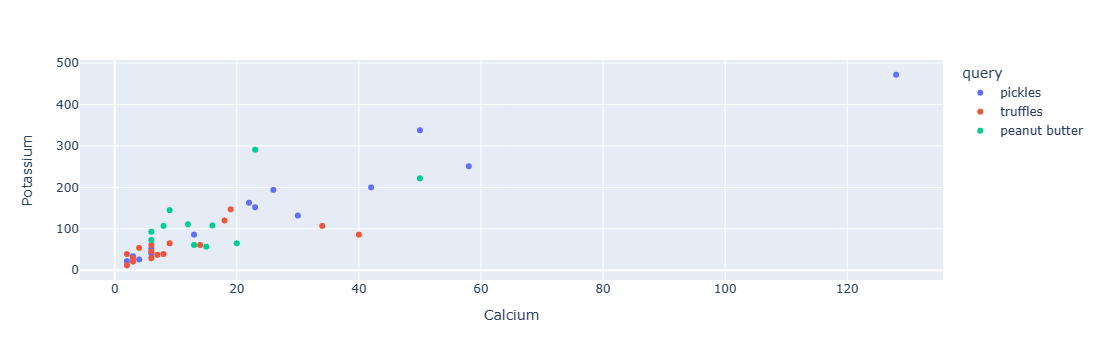

In [29]:
import plotly.express as px

px.scatter(data_frame=big_df_recipe, x='Calcium', y='Potassium', color='query', hover_data=['name'])

Can really help you refine your approach!

# How do I explore a new-to-me dataset?

## First: View raw data

- `.shape()`
- `.columns()`
- `.unique()`
- `Counter()`

## Second: Make some plots

- matplotlib
- seaborn
- plotly

## Third (next time): Calculate numerical summaries

In [30]:
import pandas as pd

# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
df_korea = pd.read_csv('korea_demo.zip')
df_korea.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0  1/1/2000              Busan  3752.0       11.61  1875.0         5.8   
1  1/1/2000  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2  1/1/2000  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3  1/1/2000              Daegu  3057.0       14.39  1117.0         5.3   
4  1/1/2000            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [31]:
# 4.86k rows, 12 columns
df_korea.shape

(4860, 12)

In [32]:
# get names of columns
df_korea.columns

Index(['Date', 'Region', 'Birth', 'Birth_rate', 'Death', 'Death_rate',
       'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate',
       'Natural_growth', 'Natural_growth_rate'],
      dtype='object')

In [33]:
# what are all the different values which appear in a given column?
df_korea['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [34]:
# using Counter to count number of entries with each value
# this is the most common way to numerically summarize a categorical variable
from collections import Counter

Counter(df_korea['Region'])

Counter({'Busan': 270,
         'Chungcheongbuk-do': 270,
         'Chungcheongnam-do': 270,
         'Daegu': 270,
         'Daejeon': 270,
         'Gangwon-do': 270,
         'Gwangju': 270,
         'Gyeonggi-do': 270,
         'Gyeongsangbuk-do': 270,
         'Gyeongsangnam-do': 270,
         'Incheon': 270,
         'Jeju': 270,
         'Jeollabuk-do': 270,
         'Jeollanam-do': 270,
         'Sejong': 270,
         'Seoul': 270,
         'Ulsan': 270,
         'Whole country': 270})

## Groupby (we'll do more numerical summaries next time)

We've seen this before! `.groupby` collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful) for a give column:

In [35]:
# average across all rows with the same Region
df_korea.groupby('Region').Birth.mean()

Region
Busan                 2148.022222
Chungcheongbuk-do     1113.507407
Chungcheongnam-do     1496.451852
Daegu                 1651.677778
Daejeon               1119.266667
Gangwon-do             990.740741
Gwangju               1086.440741
Gyeonggi-do           9175.785185
Gyeongsangbuk-do      1835.751852
Gyeongsangnam-do      2386.322222
Incheon               2016.196296
Jeju                   471.059259
Jeollabuk-do          1242.911111
Jeollanam-do          1301.962963
Sejong                 232.452381
Seoul                 7103.470370
Ulsan                  891.977778
Whole country        36140.007407
Name: Birth, dtype: float64

In [36]:
# what was the highest natural growth rate in each region?
df_korea.groupby('Region').Natural_growth_rate.max()

Region
Busan                 7.2
Chungcheongbuk-do     7.8
Chungcheongnam-do     7.6
Daegu                 9.6
Daejeon              11.9
Gangwon-do            7.2
Gwangju              13.5
Gyeonggi-do          13.2
Gyeongsangbuk-do      6.0
Gyeongsangnam-do      8.5
Incheon              11.1
Jeju                 12.1
Jeollabuk-do          7.2
Jeollanam-do          5.0
Sejong               11.5
Seoul                10.5
Ulsan                13.7
Whole country         9.7
Name: Natural_growth_rate, dtype: float64

If all columns are numeric, you can just apply `.mean()` to the whole thing:

In [37]:
# remove the 'Date' column, since it's not a number
df_korea.iloc[:,1:].groupby('Region').mean()

Birth  Birth_rate         Death  Death_rate  \
Region                                                                  
Busan               2148.022222    7.220111   1694.159259    5.756296   
Chungcheongbuk-do   1113.507407    8.727111    871.522222    6.791481   
Chungcheongnam-do   1496.451852    8.940444   1219.533333    7.244815   
Daegu               1651.677778    7.962630   1050.396296    5.090370   
Daejeon             1119.266667    9.177444    546.140741    4.461111   
Gangwon-do           990.740741    7.791259    931.503704    7.328889   
Gwangju             1086.440741    9.165630    562.325926    4.719259   
Gyeonggi-do         9175.785185    9.796630   4175.988889    4.314815   
Gyeongsangbuk-do    1835.751852    8.172222   1759.929630    7.863333   
Gyeongsangnam-do    2386.322222    8.879481   1718.614815    6.355926   
Incheon             2016.196296    8.891630   1070.692593    4.655926   
Jeju                 471.059259    9.730963    275.292593    5.570741   
Jeollabuk-do        1242.911111    7.911630   1161.418519    7.457778   
Jeollanam-do        1301.962963    8.008667   1406.022222    8.730370   
Sejong               232.452381   11.642437     92.698413    4.931092   
Seoul               7103.470370    8.475556   3460.607407    4.166296   
Ulsan                891.977778    9.666074    382.125926    4.110370   
Whole country      36140.007407    8.746185  22329.555556    5.368519   

                       Divorce  Divorce_rate      Marriage  Marriage_rate  \
Region                                                                      
Busan               698.807407      2.347037   1534.159259       5.161111   
Chungcheongbuk-do   302.181481      2.359259    711.918519       5.564074   
Chungcheongnam-do   402.762963      2.396296    966.655556       5.751481   
Daegu               438.100000      2.112593   1052.462963       5.075926   
Daejeon             277.244444      2.275556    715.929630       5.848148   
Gangwon-do          314.503704      2.470000    659.637037       5.184815   
Gwangju             253.270370      2.131852    650.244444       5.465185   
Gyeonggi-do        2404.414815      2.536667   5901.774074       6.227407   
Gyeongsangbuk-do    474.733333      2.120741   1160.522222       5.170741   
Gyeongsangnam-do    639.359259      2.368889   1495.137037       5.544815   
Incheon             652.711111      2.872963   1345.314815       5.906296   
Jeju                133.581481      2.730000    289.125926       5.923333   
Jeollabuk-do        353.618519      2.261111    767.951852       4.902963   
Jeollanam-do        360.488889      2.228889    780.800000       4.824815   
Sejong               35.333333      1.782353    123.158730       6.330252   
Seoul              1821.144444      2.178148   5398.055556       6.446667   
Ulsan               223.874074      2.422963    564.385185       6.087778   
Whole country      9976.596296      2.411481  24621.640741       5.940000   

                   Natural_growth  Natural_growth_rate  
Region                                                  
Busan                  453.862963             1.462963  
Chungcheongbuk-do      241.981481             1.932593  
Chungcheongnam-do      276.914815             1.698889  
Daegu                  601.281481             2.871111  
Daejeon                573.114815             4.711481  
Gangwon-do              59.240741             0.464074  
Gwangju                524.111111             4.447037  
Gyeonggi-do           4999.796296             5.483333  
Gyeongsangbuk-do        75.822222             0.307778  
Gyeongsangnam-do       667.707407             2.523704  
Incheon                945.496296             4.236667  
Jeju                   195.770370             4.160370  
Jeollabuk-do            81.496296             0.455185  
Jeollanam-do          -104.066667            -0.718889  
Sejong                 139.738095             6.709244  
Seoul                 3642.866667             4.310370 

## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)

plotting is an iterative process:

```python
question = 'I wonder how ...'
while understanding < understanding_needed:
    # you make a plot which answers your first 
    # question ... but raises another question!
    new_question = make_plot(question)
    
    # now you're satisfied with old question
    # but you're interested in the new one
    question = new_question

```

## Multiple Modules

There are several plotting modules. We will see examples from three:

- matplotlib
- seaborn
- plotly

# Histograms
We use histograms to investigate how often certain values appear in the data. 
- The x-axis is (almost) always the values which occur
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science


Todo list:

- `plt.hist()` on `Marriage_rate`
- resizing figure
- `density` keyword
- labelling axes
- `bin` argument
- seaborn makes it look nice
- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```

In [38]:
df_korea.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0  1/1/2000              Busan  3752.0       11.61  1875.0         5.8   
1  1/1/2000  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2  1/1/2000  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3  1/1/2000              Daegu  3057.0       14.39  1117.0         5.3   
4  1/1/2000            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [39]:
# we will want to know what the minimum and maximum Marriage_rate are
df_korea.loc[:,'Marriage_rate'].min()

2.4

In [40]:
df_korea.loc[:,'Marriage_rate'].max()

12.4

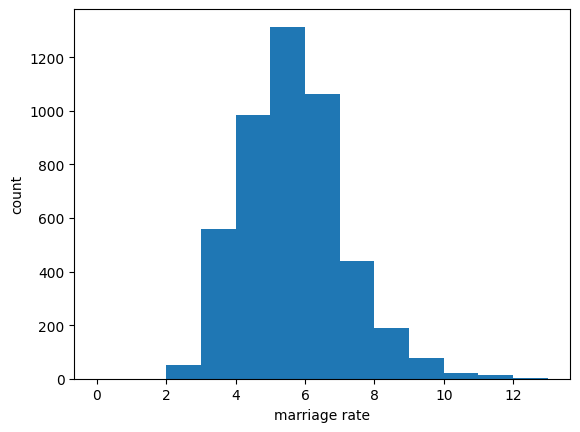

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest
bins = np.linspace(0, 13, 14)

# use matplotlib to make the histogram
plt.hist(df_korea['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')

# the below will save the histogram as a .pdf file in your directory
f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

Text(0, 0.5, 'density')

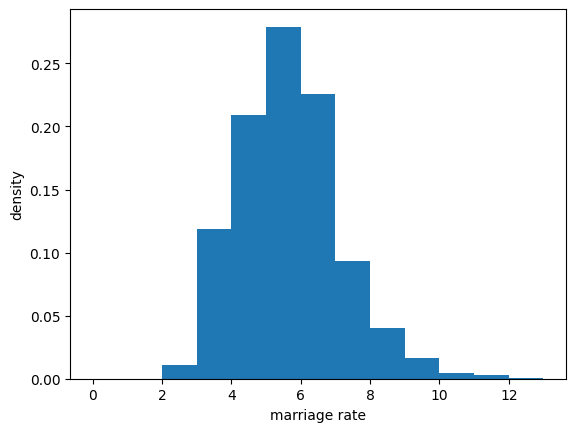

In [42]:
# change the y-axis to represent the density (so that the sum of all columns is 1)
plt.hist(df_korea['Marriage_rate'], bins=bins, density=True)
plt.xlabel('marriage rate')
plt.ylabel('density')

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `Marriage_rate` as `Region` varies.

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`

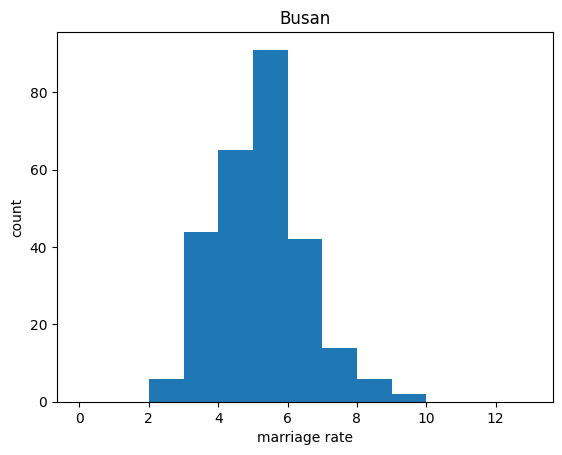

In [43]:
# build one plot, then add loop to make subplot
# let's do Busan
bool_busan = df_korea['Region'] == 'Busan'
df_busan = df_korea.loc[bool_busan, :]

plt.hist(df_busan['Marriage_rate'], bins=bins)
plt.xlabel('marriage rate')
plt.ylabel('count')
plt.gca().title.set_text('Busan') 

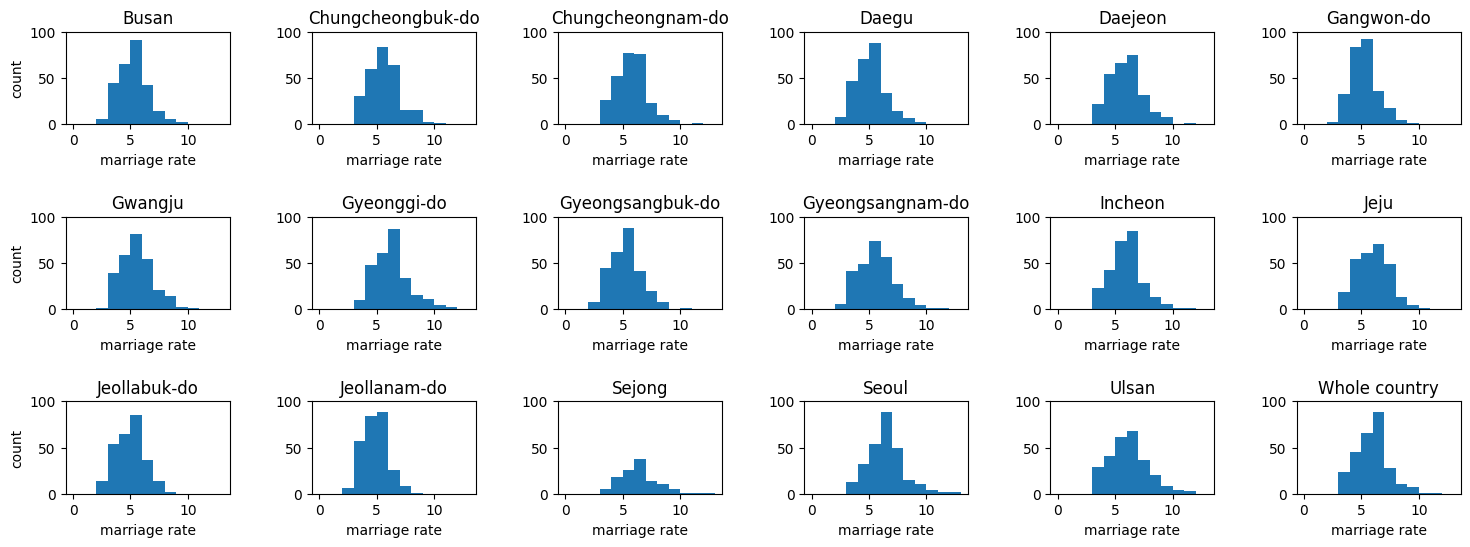

In [44]:
# now all of the regions
# a useful function to convert an array to a list is .tolist()
region_list = df_korea['Region'].unique().tolist()

for region in region_list:
    # activate a specific subplot (use .index() to find the numeric index for the current string)
    region_idx = region_list.index(region)
    plt.subplot(3, 6, region_idx + 1)
    
    # build df_region, only includes rows with region of interest
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]
    
    # plot histogram
    plt.hist(df_region['Marriage_rate'], bins=bins)
    
    plt.xlabel('marriage rate')
    # we only want the y-axis label on the first subplot of each row
    if region_idx in (0, 6, 12):
        plt.ylabel('count')
    
    plt.gca().title.set_text(region_list[region_idx]) 
    
    # may need to play around with this to make sure all plots have same/informative y range
    plt.ylim(0, 100)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(18, 6)

# (++) adjust spacing between graphs (can play around with this until it looks nice)
plt.subplots_adjust(wspace=.5, hspace=1)

## Scatter plots

What is the relationship between `Marriage_rate` and `National_growth_rate` in:
1. `Seoul`
1. `Busan`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale

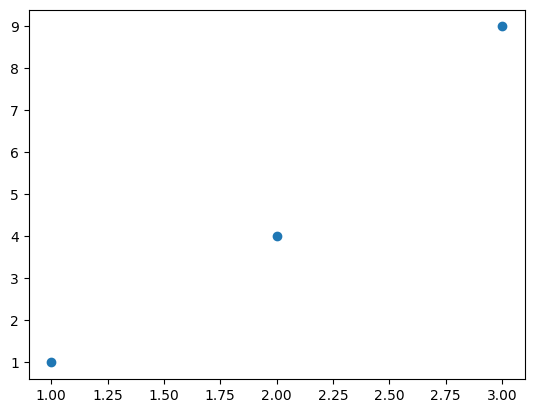

In [45]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
plt.scatter(x, y)

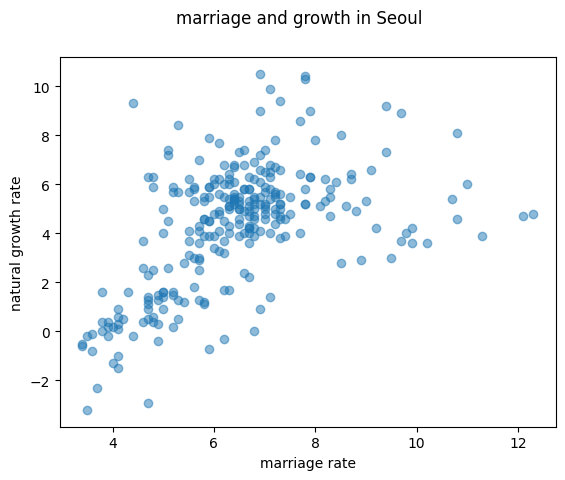

In [46]:
# select only rows corresponding to given region
bool_seoul = df_korea['Region'] == 'Seoul'
df_seoul = df_korea.loc[bool_seoul, :]

# scatter
plt.scatter(df_seoul['Marriage_rate'],
            df_seoul['Natural_growth_rate'], alpha=.5)

# label
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
plt.suptitle('marriage and growth in Seoul');

Text(0, 0.5, 'natural growth rate')

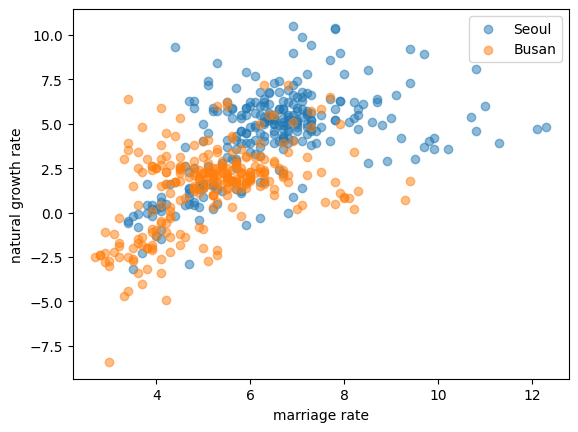

In [47]:
two_regions = ['Seoul', 
               'Busan']

for region in two_regions:
    # boolean index
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]

    # scatter
    plt.scatter(df_region['Marriage_rate'],
                df_region['Natural_growth_rate'], alpha=.5, label=region)
    
plt.legend()
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
# plt.gcf().set_size_inches(10, 8)
# plt.suptitle('comparing relationship of marriage and growth in Seoul and Busan');

# Line Plots

What was the mean `Marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

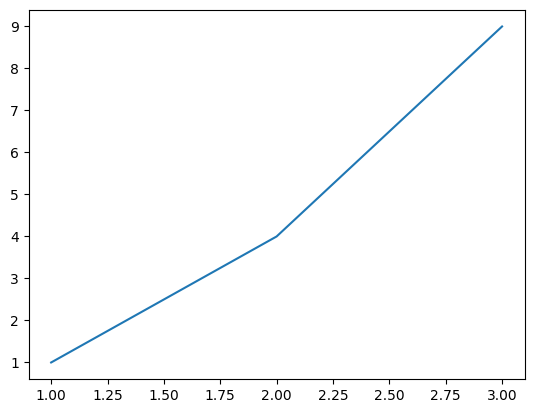

In [48]:
# simple line plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

In [49]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0 2000-01-01              Busan  3752.0       11.61  1875.0         5.8   
1 2000-01-01  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2 2000-01-01  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3 2000-01-01              Daegu  3057.0       14.39  1117.0         5.3   
4 2000-01-01            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [50]:
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [51]:
mean_marriage_by_date = df_korea_new.groupby('Date').Marriage_rate.mean()
mean_marriage_by_date

Date
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

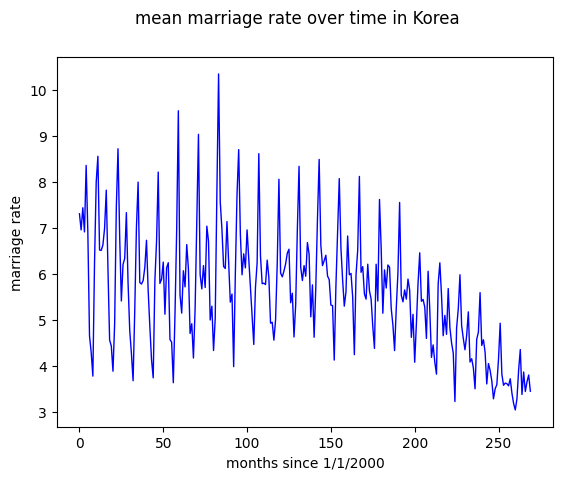

In [52]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
date = range(mean_marriage_by_date.size)
plt.plot(date, mean_marriage_by_date,
        color='b', linewidth=1, linestyle='-')
plt.xlabel('months since 1/1/2000')
plt.ylabel('marriage rate')
plt.suptitle('mean marriage rate over time in Korea');

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean

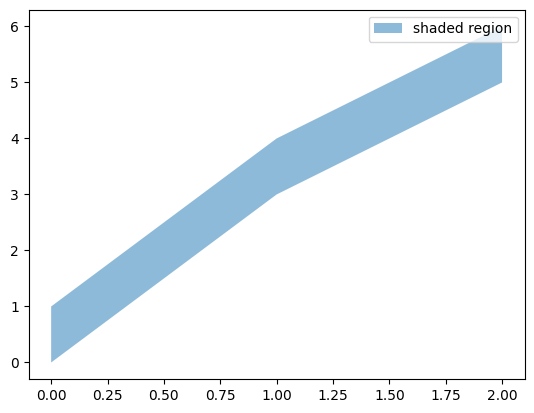

In [53]:
# simple fill between example
x = [0, 1, 2]
top = [1, 4, 6]
btm = [0, 3, 5]
plt.fill_between(x, top, btm, alpha=.5, label='shaded region')
plt.legend()

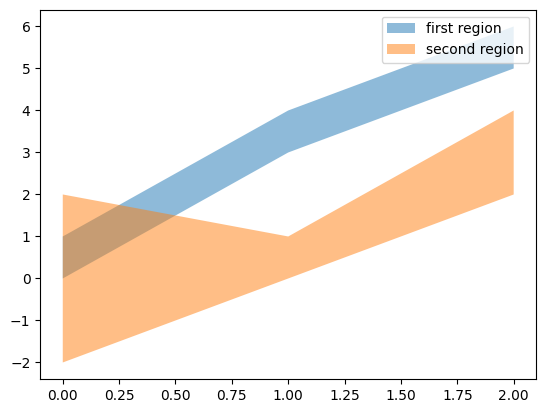

In [54]:
# slightly more complex example
x = [0, 1, 2]
regions = pd.Series({'top1': [1, 4, 6],
                    'top2': [2, 1, 4],
                    'btm1': [0, 3, 5],
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2):
    plt.fill_between(x, regions[area], regions[area+2], alpha = .5, label = labels[area])

plt.legend()

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



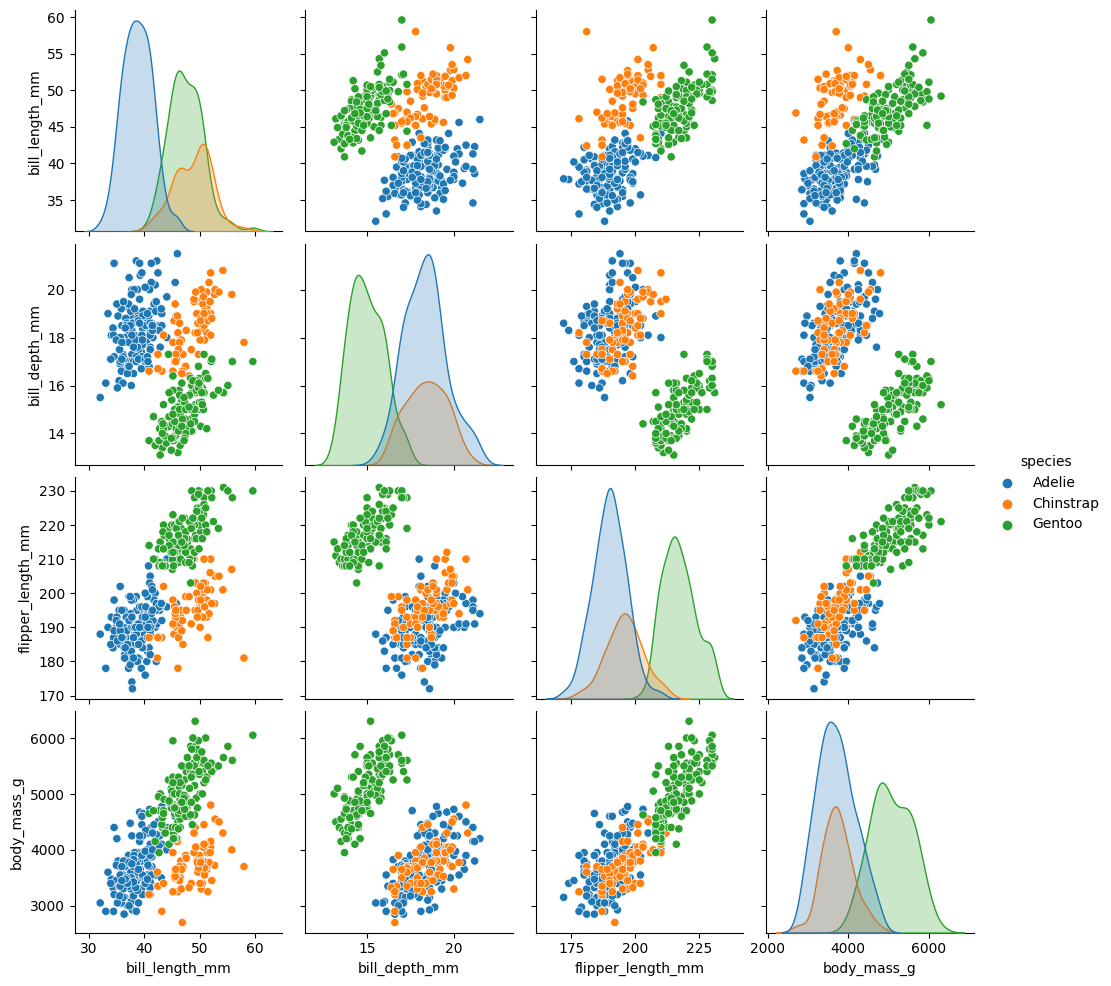

In [55]:
df_penguin = sns.load_dataset('penguins')

sns.pairplot(df_penguin, hue='species')

C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



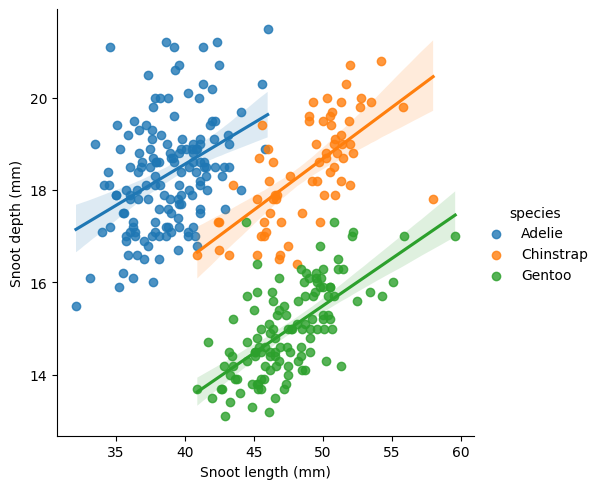

In [56]:
# Plot bill depth as a function of bill length by species
g = sns.lmplot(
    data=df_penguin,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# Plotly
* Interactive visualization library
* https://plot.ly/python/ (https://plot.ly/python/getting-started/)
* Plotly is a big library, plotly express is a simplified interface
* Plotly uses different syntax as matplotlib / seaborn :(!

### Plotly scatter plots
- `hover_data`
- `color`
- `symbol`
- `size`

In [57]:
# use the df_korea_new which removed Whole country
# discard rows which are missing any feature
df_korea_nomiss = df_korea_new.dropna(axis=0, how='any')
df_korea_nomiss.shape

(4439, 12)

In [58]:
df_korea_nomiss.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0 2000-01-01              Busan  3752.0       11.61  1875.0         5.8   
1 2000-01-01  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2 2000-01-01  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3 2000-01-01              Daegu  3057.0       14.39  1117.0         5.3   
4 2000-01-01            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

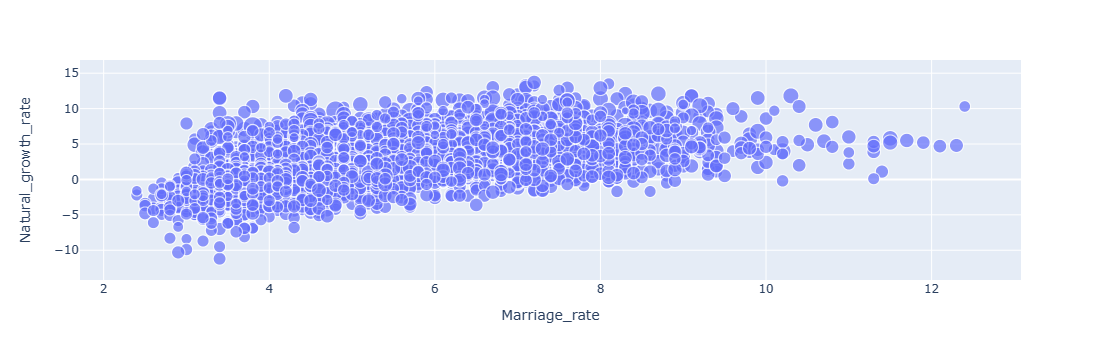

In [59]:
px.scatter(df_korea_nomiss, x='Marriage_rate', y='Natural_growth_rate', hover_data=['Date', 'Region'], size='Divorce_rate')

## Getting to Know You Data

Download it from Canvas if you haven't already.

In [60]:
gtky = pd.read_csv('cleaner_gtky.csv', index_col='fake_student_id')
# only drop rows with missing values from one (or a list of several) columns
gtky_nomiss = gtky.dropna(axis=0, how='any')
gtky_nomiss.shape

(132, 11)

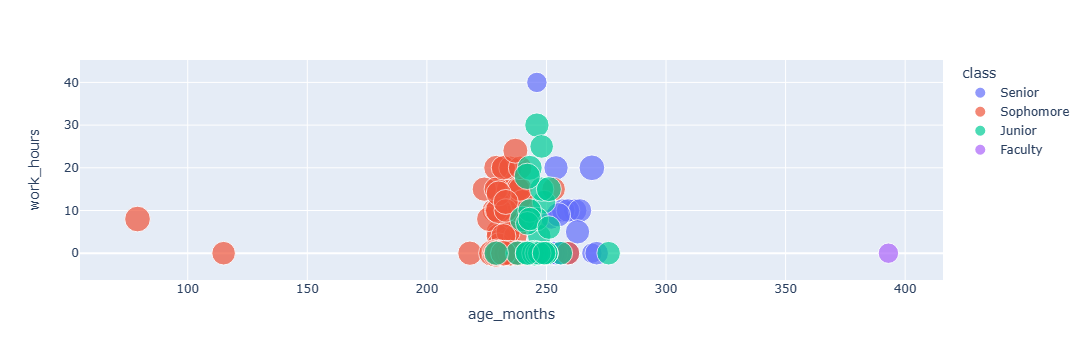

In [61]:
fig = px.scatter(data_frame=gtky_nomiss, x='age_months', y='work_hours', color='class', hover_data=['co_op'], size='credit_hours')
fig.show()

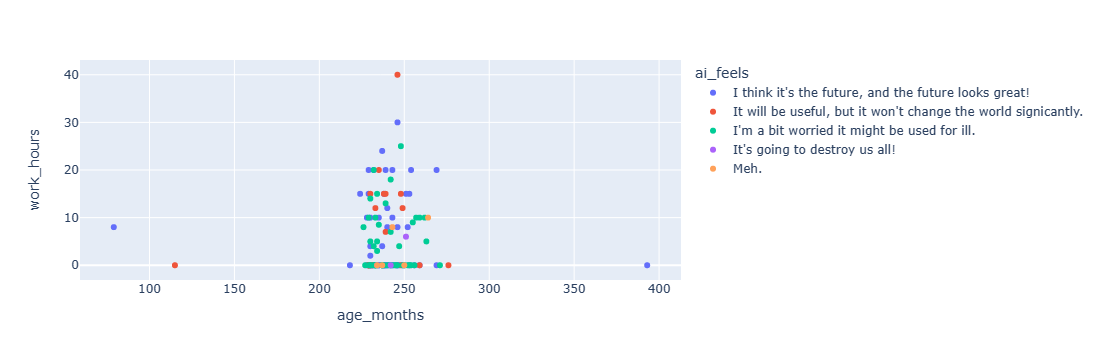

In [62]:
px.scatter(data_frame=gtky_nomiss, x = 'age_months', y = 'work_hours', color = 'ai_feels')

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [63]:
import plotly

plotly.offline.plot(fig, filename='class_data.html');

## Plotly does line plots too

- color

In [64]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'x':  [1, 2, 3, 4, 5, 6],
                   'y':  [2, 3, 4, 7, 10, 24],
                  'grp': [0, 1, 0, 1, 0, 1]})
df

x   y  grp
0  1   2    0
1  2   3    1
2  3   4    0
3  4   7    1
4  5  10    0
5  6  24    1

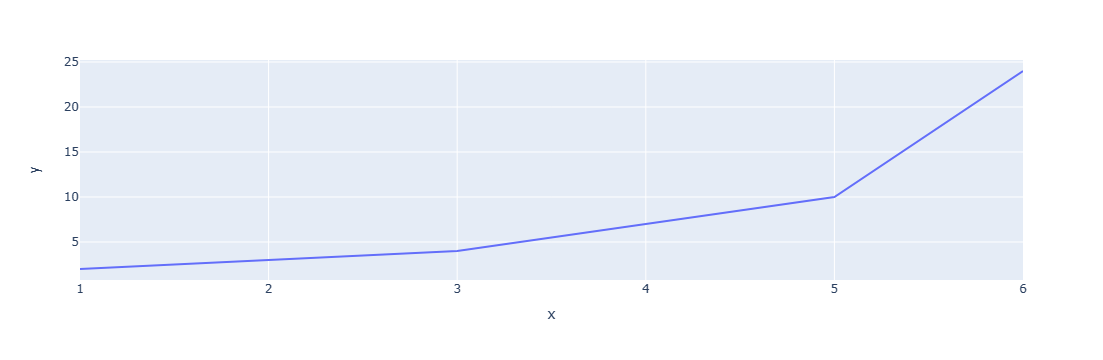

In [65]:
px.line(data_frame=df, x='x', y='y')

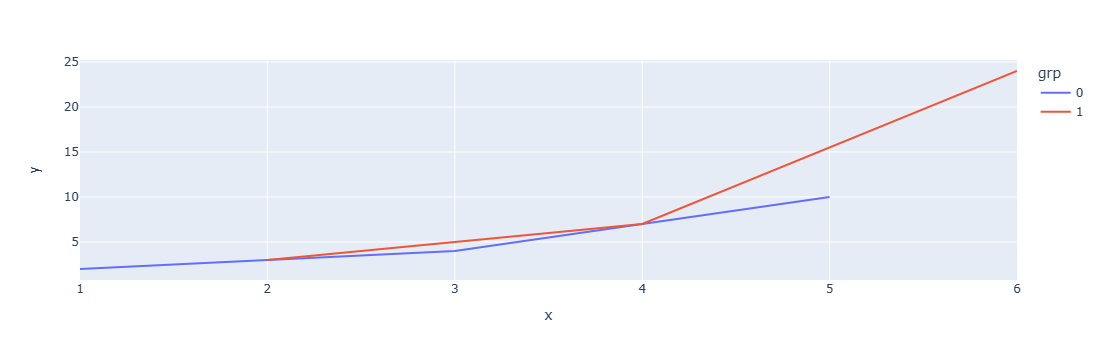

In [66]:
px.line(data_frame=df, x='x', y='y', color='grp')